<a href="https://colab.research.google.com/github/OlegV12/Data-Analysis-Algorithms/blob/Lesson_3/Alg_Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 


In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd


In [319]:
def calc_logloss(y, y_pred):
  eps = np.nextafter(0, 1)
  y_pred[y_pred == 1] = 1 - eps
  y_pred[y_pred == 0] = eps

  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [405]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [406]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [407]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [408]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [409]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [410]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [411]:
def eval_model(X, y, iterations, alpha=1e-4,):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    # if i % (iterations / 10) == 0:
    #     print(i, W, err)
    return W, err

In [412]:
alpha = [1e-2, 1e-3, 1e-4,]
iter = [5000, 10000, 15000]

errors = []
for a in alpha:
  for i in iter: 
    w = eval_model(X_st, y, iterations=i, alpha=a)
    errors.append(w[1])


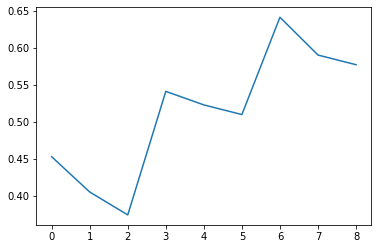

In [413]:
plt.plot(errors)

In [414]:
errors

[0.4534151021622755,
 0.4058305387773311,
 0.3748944911339157,
 0.5416473056405607,
 0.5233563729128639,
 0.5103453809352965,
 0.6416846622934699,
 0.5906743816929662,
 0.5776141768084071]

Оптимальные параметры: 15000 итераций и скорость обучения 1e-2

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [415]:
lr_model = eval_model(X_st, y, iterations=15000, alpha=1e-2)

In [416]:
def calc_pred_proba(W, X):
  pred = np.dot(W, X_st)
  y_pred_proba = 1 / (1 + np.exp(-pred))


  return y_pred_proba

In [417]:
predict_prob = calc_pred_proba(lr_model[0], X_st)
predict_prob

array([0.25837324, 0.27275949, 0.87259994, 0.26550415, 0.76267207,
       0.51778979, 0.95509356, 0.1378597 , 0.25485493, 0.88250437])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).



In [418]:
def calc_pred (W, X, base_line=0.5):
  predict_prob = calc_pred_proba(W, X)
  predict_prob[predict_prob >= base_line] = 1
  predict_prob[predict_prob<base_line] = 0

  return predict_prob


In [419]:
calc_pred(lr_model[0], X_st, 0.52) # при bseline ==0.52 получим еще один точно предсказанный альтернативный класс

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [420]:
y_predictions = calc_pred(lr_model[0], X_st)
y_predictions

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

In [421]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [422]:
tp = 0
tn = 0
fp = 0
fn = 0
for indx, itm in enumerate(y_predictions):
  if itm == y[indx] and itm == 1: # true positive
    tp += 1
  elif itm == y[indx] and itm == 0: # true negative
    tn += 1
  elif itm != y[indx] and itm == 0: # false negative
    fn += 1
  elif itm != y[indx] and itm == 1: # false positive
    fp += 1    


In [423]:
accuracy = tp / len(y[y==1])
accuracy

0.8

In [424]:
err_matrix = np.array([[tp, fp], [tn, fn]])
err_matrix

array([[4, 1],
       [4, 1]])

In [425]:
precision = tp/ (tp+fp)
precision

0.8

In [426]:
recall = tp/(tp+fn)
recall

0.8

In [427]:
f1 = 2*precision*recall/(precision+ recall)
f1

0.8000000000000002

6. Могла ли модель переобучиться? Почему?

Да могла, т.к. количестово наблюдений очень мало и мы ничего не делали чтобы переобучение предотвратить. При увеличении количества итераций logloss продолжит уменьшаться. 

7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [465]:
def abs_matrix(x):
  mask = (x >= 0) * 1
  mask_2= (x<0)*-1
  return mask+mask_2

In [466]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_value=0.001):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * (np.dot((y_pred - y), X.T)+((lambda_value*W)/abs_matrix(W))))

    return W, err

In [467]:
alpha = [1e-2, 1e-3, 1e-4,]
iter = [5000, 10000, 15000,]

errors = []
for a in alpha:
  for i in iter: 
    w = eval_model_l1(X_st, y, iterations=i, alpha=a)
    errors.append(w[1])

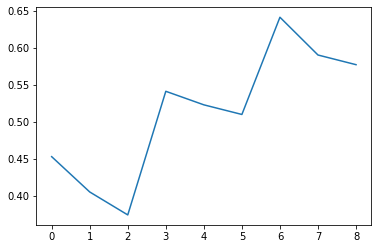

In [468]:
plt.plot(errors)

In [469]:
np.min(errors)

0.37474175122874664

In [470]:
def eval_model_l2(X, y, iterations, alpha=1e-4,lambda_value=0.001):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * (np.dot((y_pred - y), X.T)+(2*lambda_value*W)))

    return W, err

In [471]:
alpha = [1e-2, 1e-3, 1e-4,]
iter = [5000, 10000, 15000,]

errors = []
for a in alpha:
  for i in iter: 
    w = eval_model_l2(X_st, y, iterations=i, alpha=a)
    errors.append(w[1])

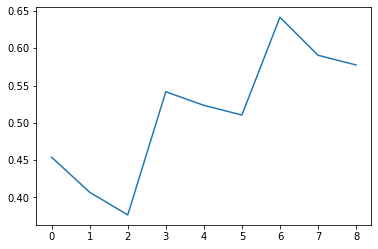

In [472]:
plt.plot(errors)

In [473]:
np.min(errors)

0.37644053375046743